In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter


warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('cleaned_data.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,Patient Sex_Female,Patient Sex_Male,Age Group
0,0,0.950134,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0,Young
1,6,0.182663,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg,0,1,Young
2,7,0.182663,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg,1,0,Young
3,8,0.097388,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg,0,1,Young
4,10,1.035409,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg,0,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,59,0.353212,Female,59_left.jpg,59_right.jpg,normal fundus,central retinal artery occlusion,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",59_left.jpg,0,1,Young
1722,63,1.547056,Male,63_left.jpg,63_right.jpg,normal fundus,pigment epithelium proliferation,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",63_left.jpg,0,1,Young
1723,124,0.864860,Female,124_left.jpg,124_right.jpg,normal fundus,lens dust，myelinated nerve fibers,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",124_left.jpg,0,1,Young
1724,138,0.097388,Female,138_left.jpg,138_right.jpg,epiretinal membrane,spotted membranous change,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",138_left.jpg,1,0,Young


In [26]:
df.isnull().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
Patient Sex_Female           0
Patient Sex_Male             0
Age Group                    0
dtype: int64

In [32]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1726 non-null   int64  
 1   Patient Age                1726 non-null   float64
 2   Patient Sex                1726 non-null   object 
 3   Left-Fundus                1726 non-null   object 
 4   Right-Fundus               1726 non-null   object 
 5   Left-Diagnostic Keywords   1726 non-null   object 
 6   Right-Diagnostic Keywords  1726 non-null   object 
 7   N                          1726 non-null   int64  
 8   D                          1726 non-null   int64  
 9   G                          1726 non-null   int64  
 10  C                          1726 non-null   int64  
 11  A                          1726 non-null   int64  
 12  H                          1726 non-null   int64  
 13  M                          1726 no

In [33]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   ID  Patient Age Patient Sex  Left-Fundus  Right-Fundus  \
0   0     0.950134      Female   0_left.jpg   0_right.jpg   
1   6     0.182663        Male   6_left.jpg   6_right.jpg   
2   7     0.182663      Female   7_left.jpg   7_right.jpg   
3   8     0.097388        Male   8_left.jpg   8_right.jpg   
4  10     1.035409        Male  10_left.jpg  10_right.jpg   

      Left-Diagnostic Keywords  \
0                     cataract   
1  macular epiretinal membrane   
2                       drusen   
3                normal fundus   
4          epiretinal membrane   

                           Right-Diagnostic Keywords  N  D  G  ...  H  M  O  \
0                                      normal fundus  0  0  0  ...  0  0  0   
1  moderate non proliferative retinopathy，epireti...  0  1  0  ...  0  0  1   
2                  mild nonproliferative retinopathy  0  1  0  ...  0  0  1   
3                                      normal fundus  1  0  0  ...  0  0  0   
4                 

In [34]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                ID  Patient Age            N            D            G  \
count  1726.000000  1726.000000  1726.000000  1726.000000  1726.000000   
mean   2060.638470     0.717976     0.298957     0.289687     0.078795   
std    1360.315053     0.536149     0.457934     0.453749     0.269496   
min       0.000000     0.012113     0.000000     0.000000     0.000000   
25%     826.500000     0.267937     0.000000     0.000000     0.000000   
50%    2117.500000     0.609036     0.000000     0.000000     0.000000   
75%    3069.750000     1.035409     1.000000     1.000000     0.000000   
max    4784.000000     2.826176     1.000000     1.000000     1.000000   

                 C            A            H            M            O  \
count  1726.000000  1726.000000  1726.000000  1726.000000  1726.000000   
mean      0.093279     0.059096     0.030127     0.053882     0.286211   
std       0.290908     0.235873     0.170988     0.225850     0.452120   
min       0.

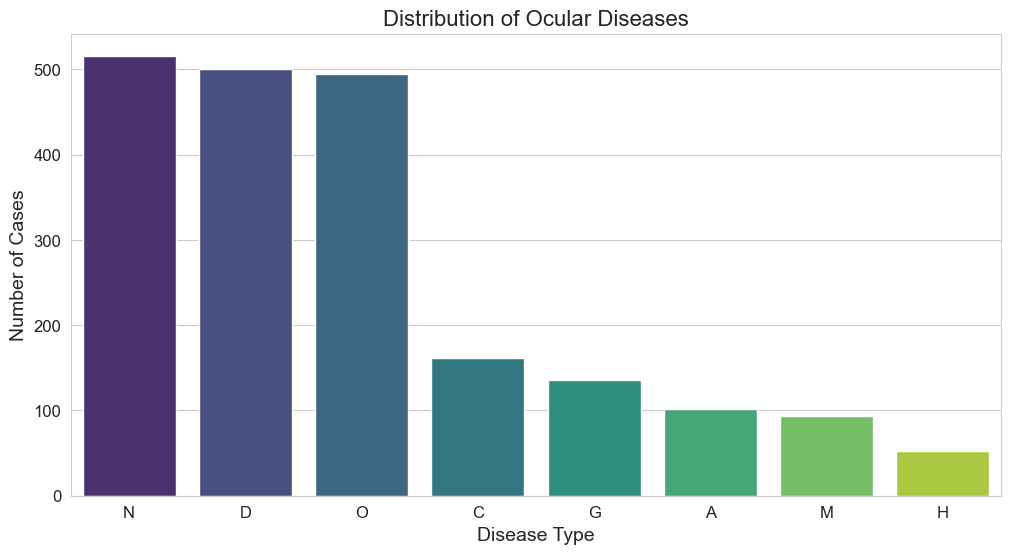

In [46]:
## 1. Distribution of Diseases
# The target columns are N, D, G, C, A, H, M, O
disease_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
disease_counts = df[disease_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="viridis")
plt.title('Distribution of Ocular Diseases', fontsize=16)
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

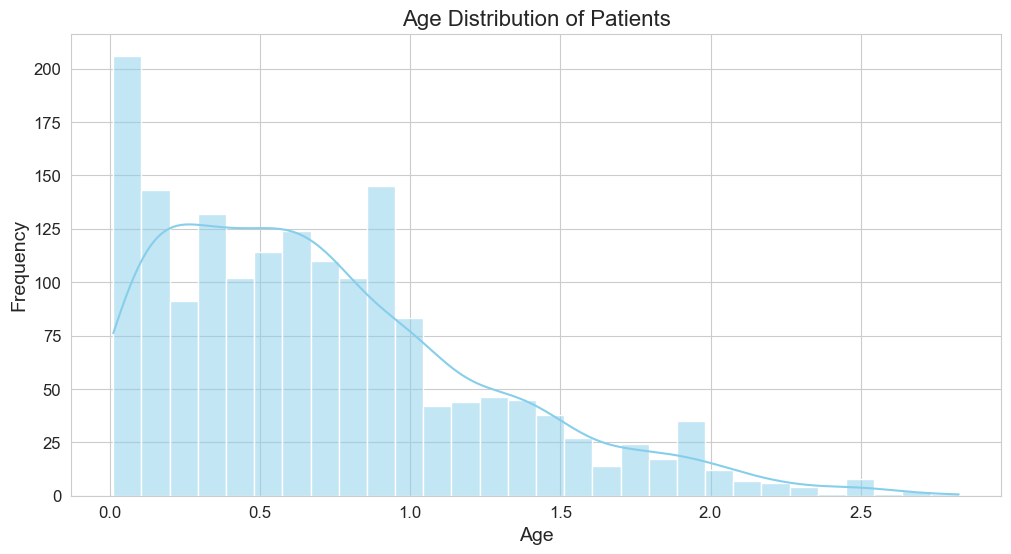

In [37]:
# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Patient Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


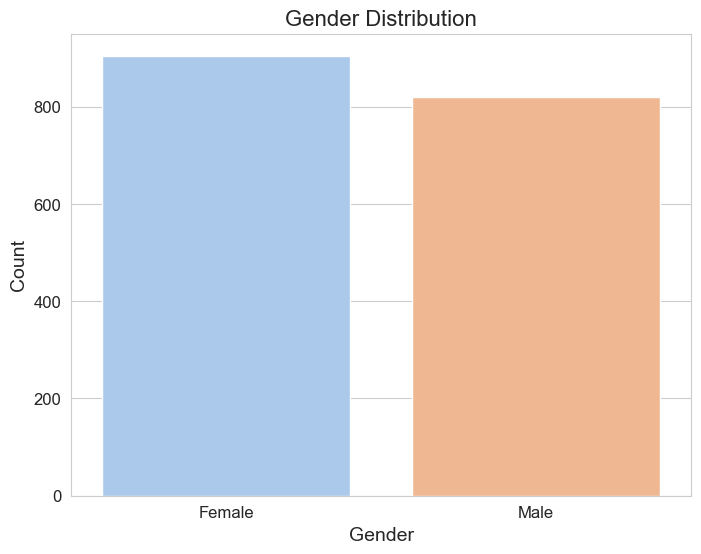

In [38]:
##  Gender Distribution
gender_counts = df['Patient Sex'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


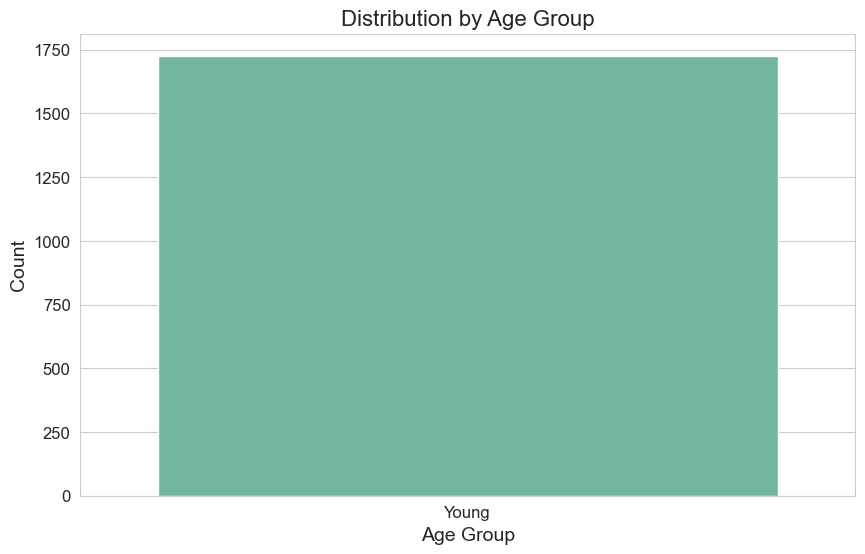

In [39]:
##  Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=df, palette="Set2")
plt.title('Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


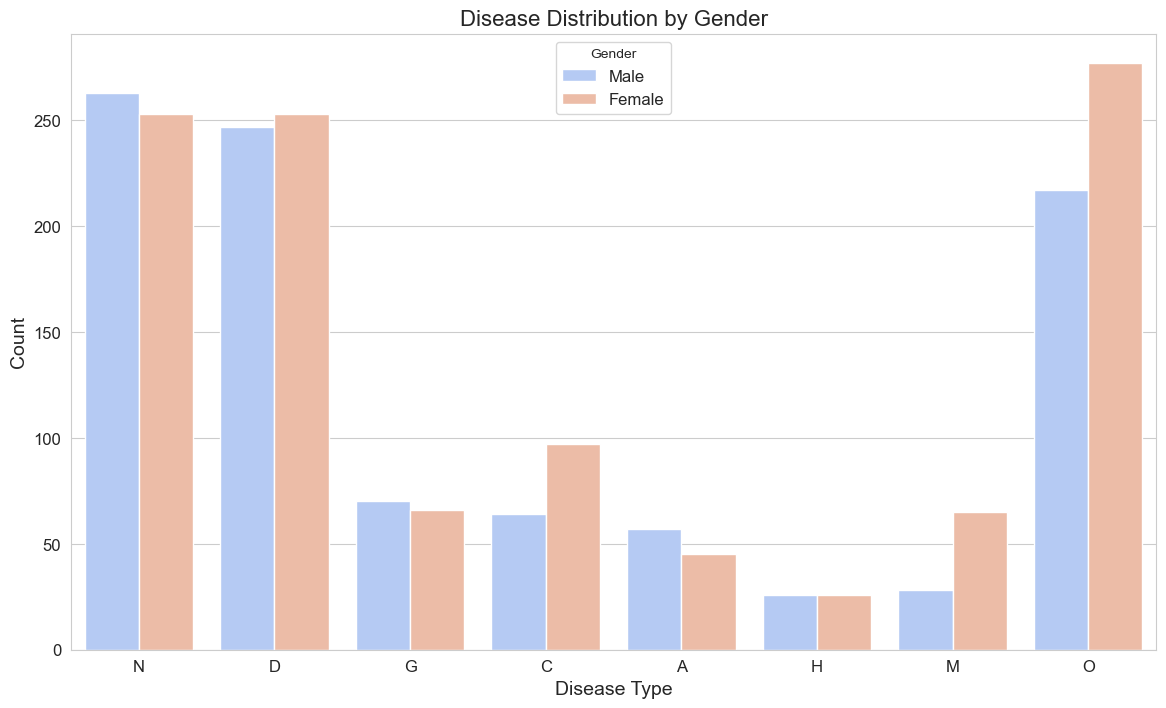

In [40]:
## 5. Disease by Gender
# Melt the dataframe for better visualization

melted_df = df.melt(id_vars=['Patient Sex'], value_vars=disease_columns, 
                    var_name='Disease', value_name='Presence')
melted_df = melted_df[melted_df['Presence'] == 1]

plt.figure(figsize=(14, 8))
sns.countplot(x='Disease', hue='Patient Sex', data=melted_df, palette="coolwarm")
plt.title('Disease Distribution by Gender', fontsize=16)
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.show()

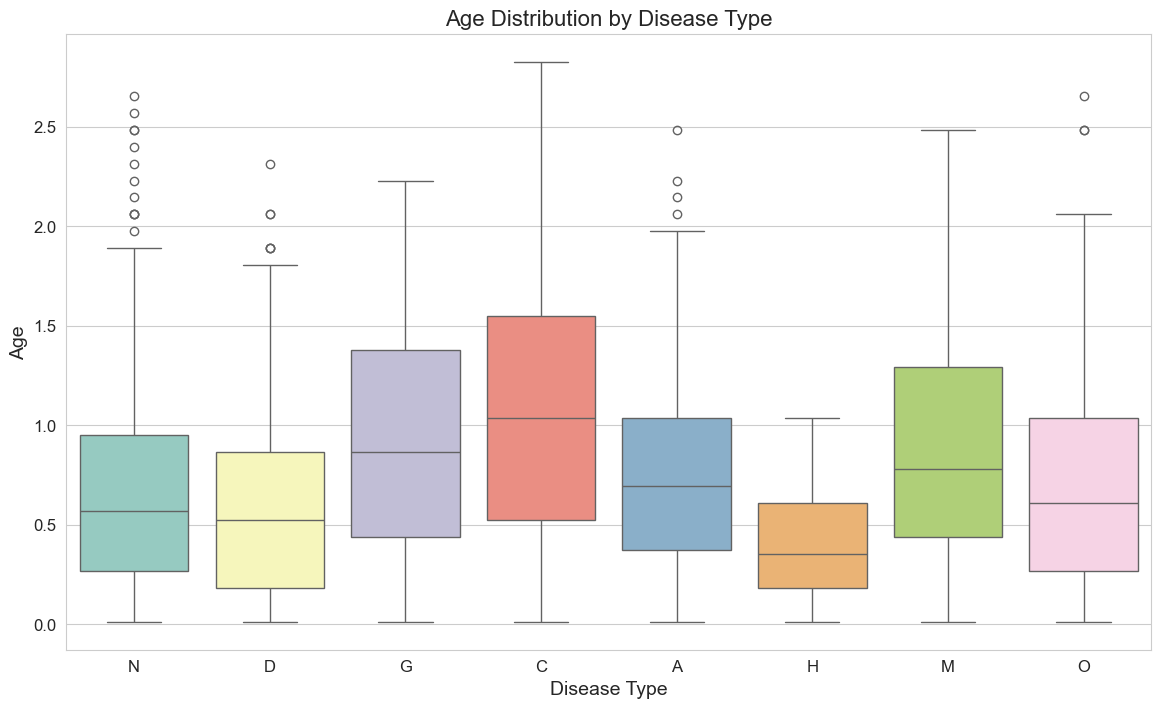

In [41]:
# Age Distribution by Disease
# Create a long format dataframe for diseases
disease_age_df = pd.melt(df, id_vars=['Patient Age'], value_vars=disease_columns,
                        var_name='Disease', value_name='Presence')
disease_age_df = disease_age_df[disease_age_df['Presence'] == 1]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Disease', y='Patient Age', data=disease_age_df, palette="Set3")
plt.title('Age Distribution by Disease Type', fontsize=16)
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


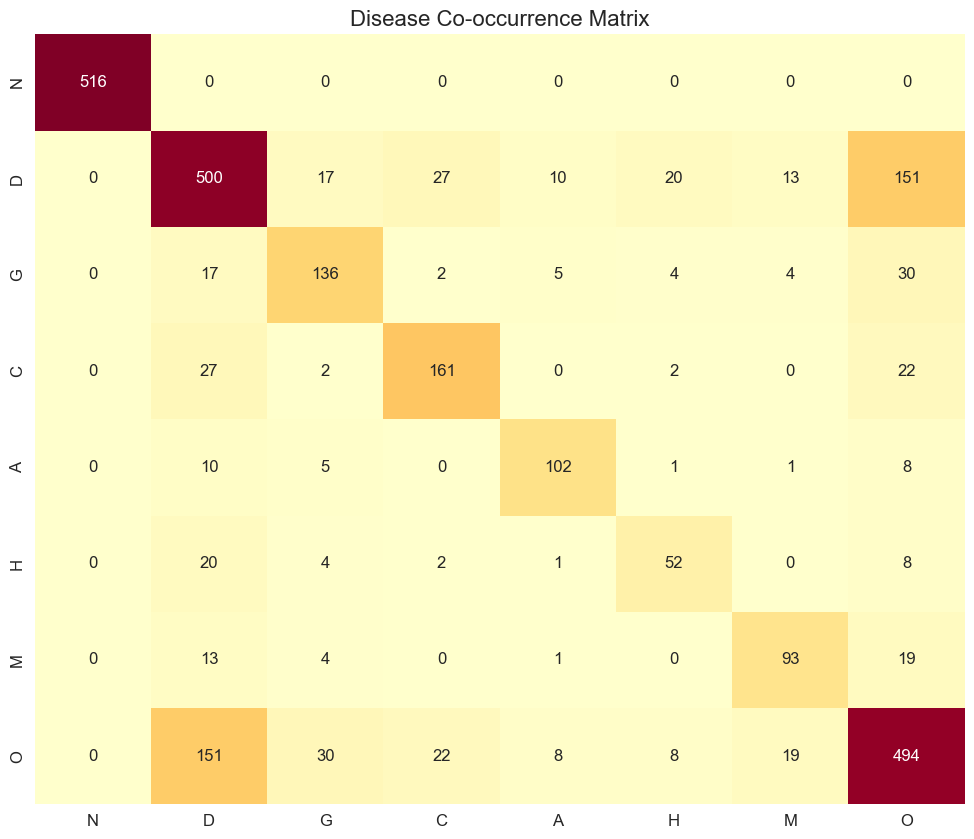

In [42]:
##  Co-occurrence of Diseases
# Calculate co-occurrence matrix
co_occurrence = df[disease_columns].T.dot(df[disease_columns])

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='YlOrRd', 
            annot_kws={"size": 12}, cbar=False)
plt.title('Disease Co-occurrence Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

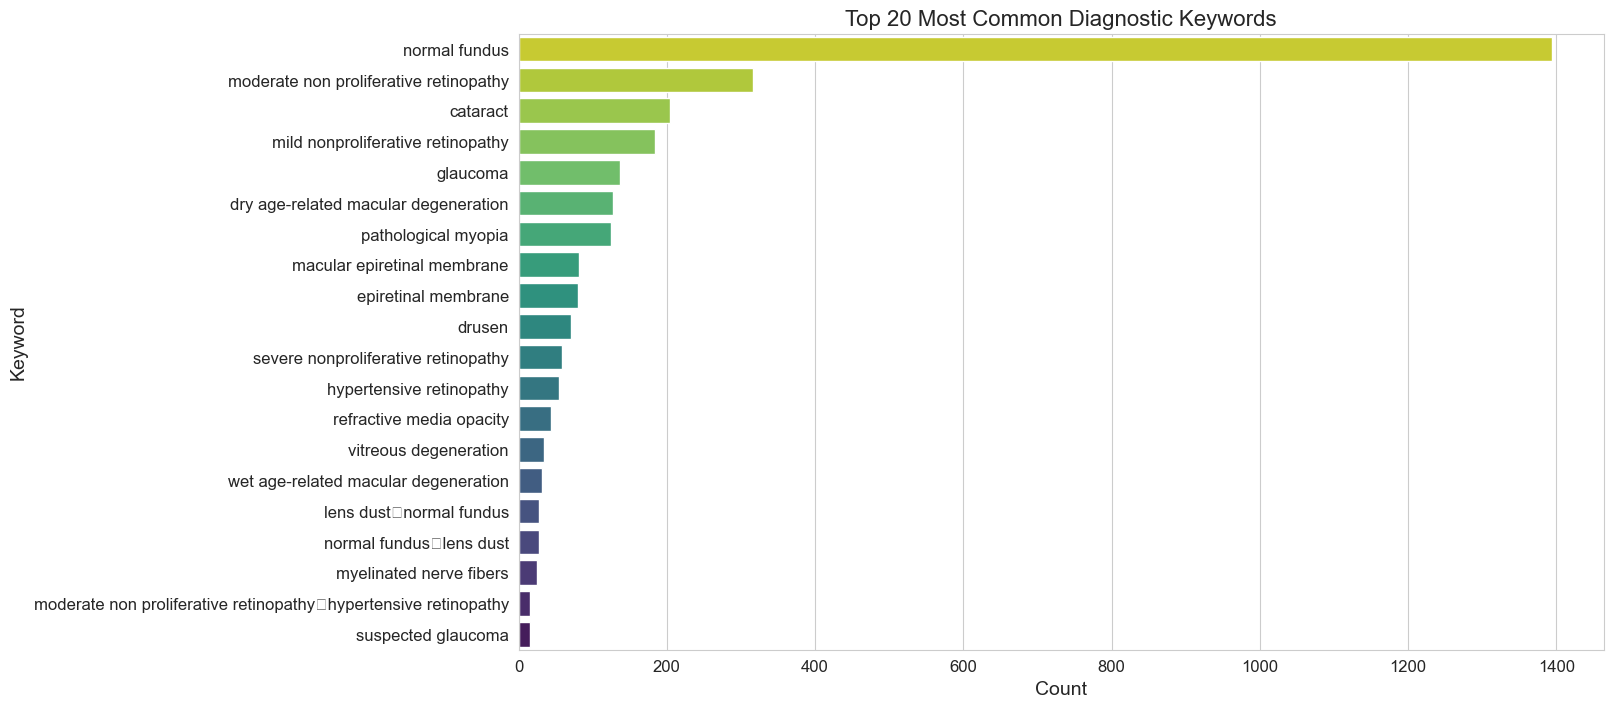

In [43]:
##  Most Common Diagnostic Keywords
# Combine left and right diagnostic keywords
all_keywords = []
for keywords in df['Left-Diagnostic Keywords'].dropna():
    all_keywords.extend([kw.strip() for kw in keywords.split(',')])
for keywords in df['Right-Diagnostic Keywords'].dropna():
    all_keywords.extend([kw.strip() for kw in keywords.split(',')])

# Count keyword frequencies
keyword_counts = Counter(all_keywords)
top_keywords = pd.DataFrame(keyword_counts.most_common(20), 
                          columns=['Keyword', 'Count'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Keyword', data=top_keywords, palette="viridis_r")
plt.title('Top 20 Most Common Diagnostic Keywords', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

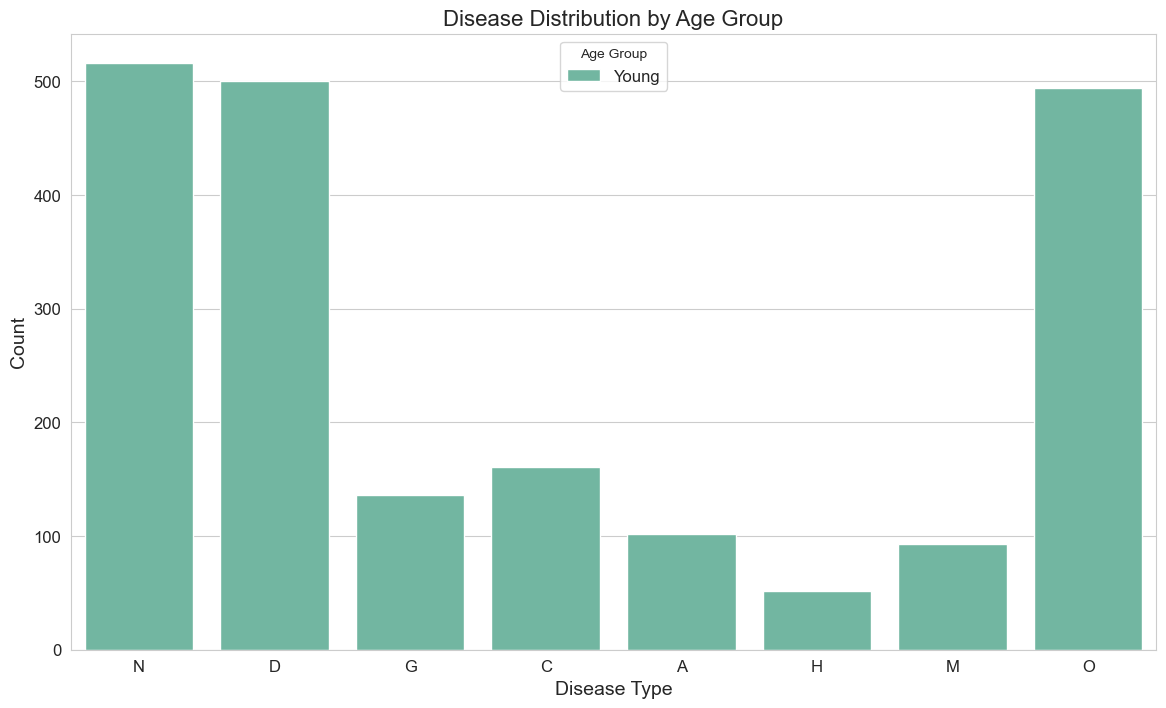

In [44]:
##  Disease Distribution by Age Group
plt.figure(figsize=(14, 8))
melted_age_df = df.melt(id_vars=['Age Group'], value_vars=disease_columns, 
                       var_name='Disease', value_name='Presence')
melted_age_df = melted_age_df[melted_age_df['Presence'] == 1]

sns.countplot(x='Disease', hue='Age Group', data=melted_age_df, palette="Set2")
plt.title('Disease Distribution by Age Group', fontsize=16)
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Age Group', fontsize=12)
plt.show()

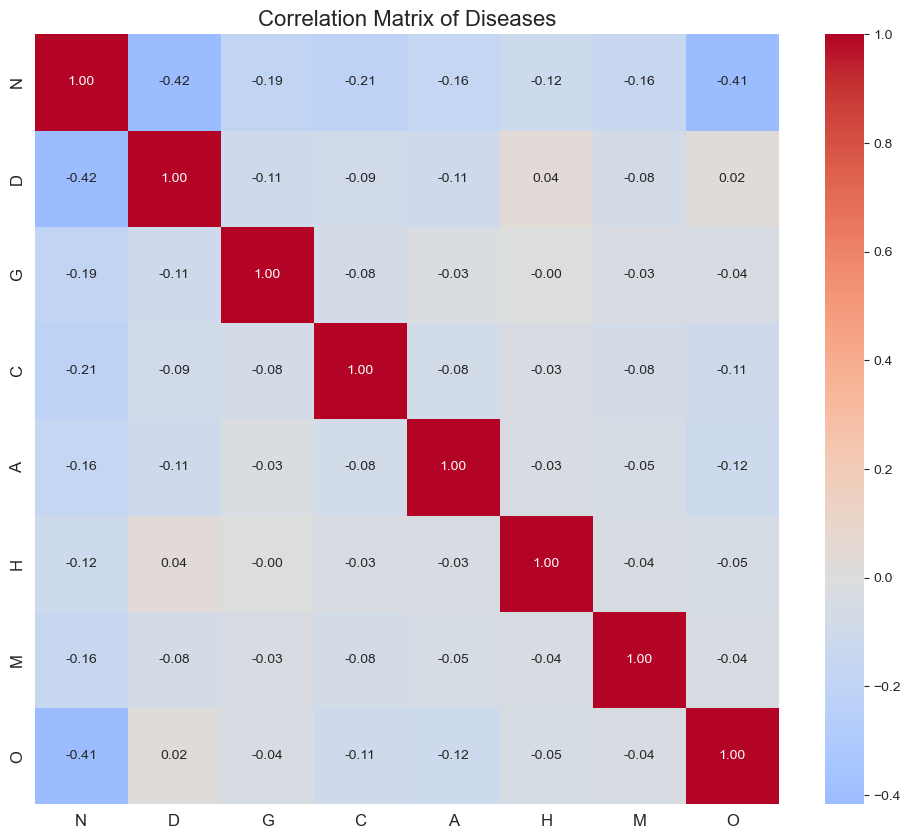

In [45]:
## Correlation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = df[disease_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Matrix of Diseases', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

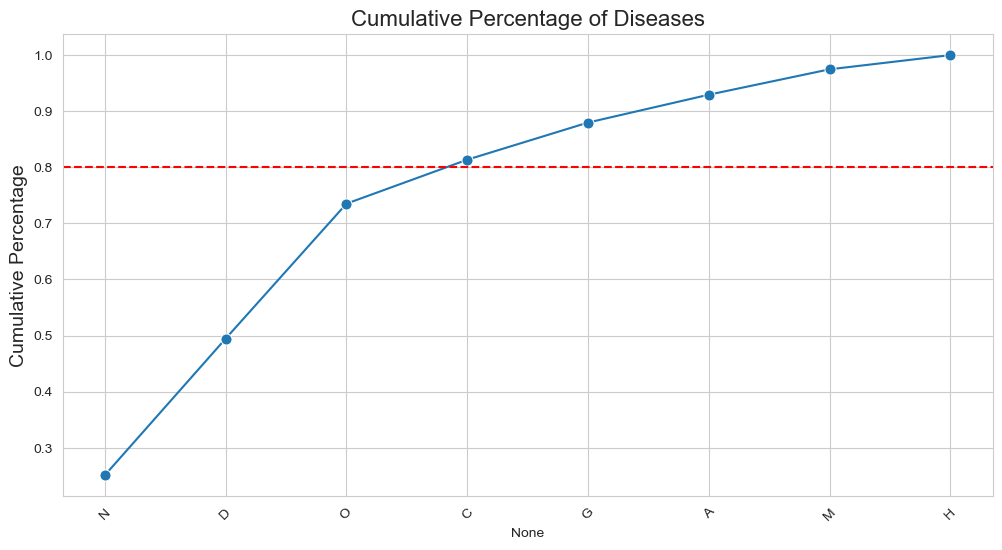

In [48]:
# تحليل تراكمي للأمراض
cumulative = df[disease_columns].sum().sort_values(ascending=False).cumsum()
cumulative_percentage = cumulative / cumulative.max()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_percentage.index, y=cumulative_percentage.values,
             marker='o', markersize=8)
plt.axhline(0.8, color='red', linestyle='--')
plt.title('Cumulative Percentage of Diseases', fontsize=16)
plt.ylabel('Cumulative Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.show()

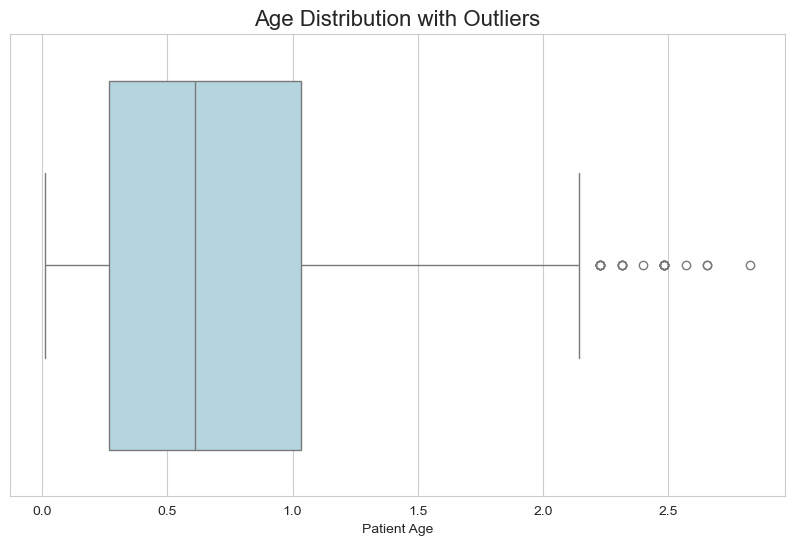


Number of age outliers: 23


In [49]:
# تحليل النقاط المتطرفة في العمر
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Patient Age'], color='lightblue')
plt.title('Age Distribution with Outliers', fontsize=16)
plt.show()

# حساب النقاط المتطرفة
Q1 = df['Patient Age'].quantile(0.25)
Q3 = df['Patient Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Patient Age'] < (Q1 - 1.5 * IQR)) | 
              (df['Patient Age'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of age outliers: {len(outliers)}")

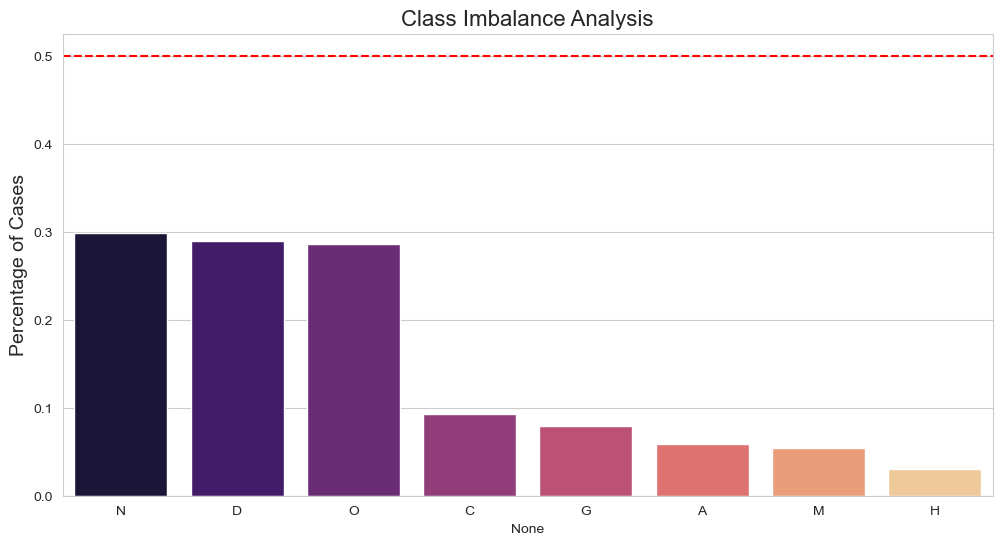

In [50]:
# حساب نسبة كل مرض
disease_ratios = (df[disease_columns].sum() / len(df)).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_ratios.index, y=disease_ratios.values, palette='magma')
plt.axhline(0.5, color='red', linestyle='--')
plt.title('Class Imbalance Analysis', fontsize=16)
plt.ylabel('Percentage of Cases', fontsize=14)
plt.show()

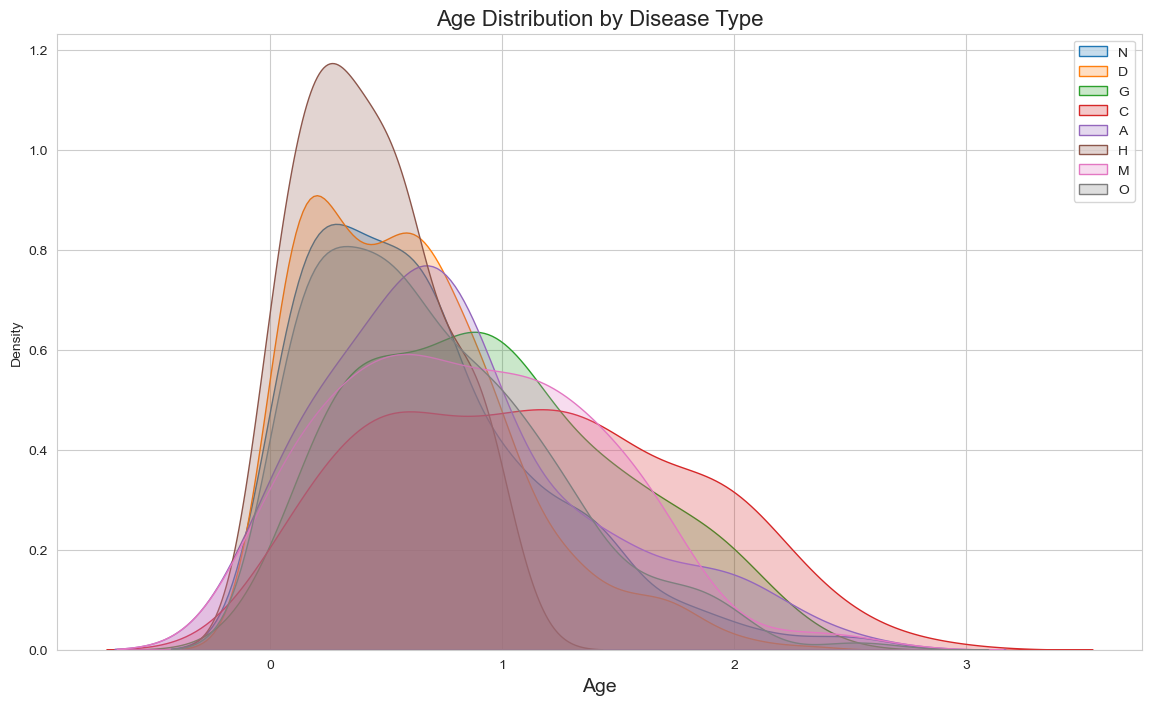

In [51]:
# تصور أكثر تفصيلاً للعلاقة بين العمر والأمراض
plt.figure(figsize=(14, 8))
for disease in disease_columns:
    sns.kdeplot(df[df[disease] == 1]['Patient Age'], label=disease, shade=True)
plt.title('Age Distribution by Disease Type', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.legend()
plt.show()

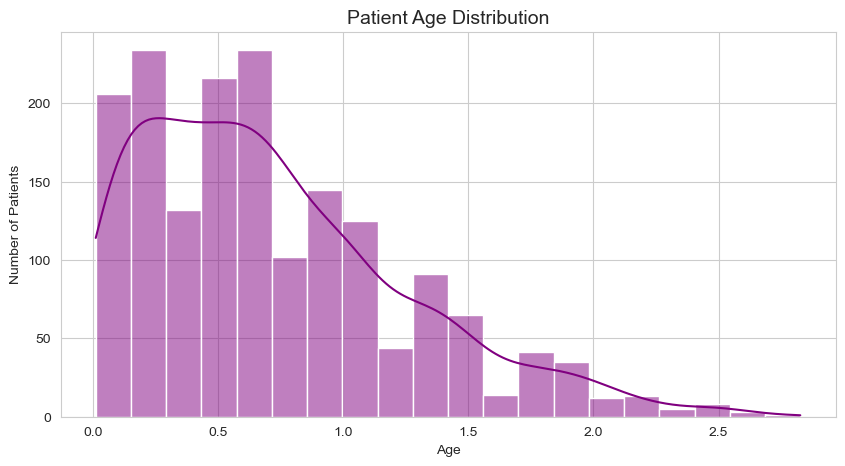

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df['Patient Age'], bins=20, color='purple', kde=True)
plt.title("Patient Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

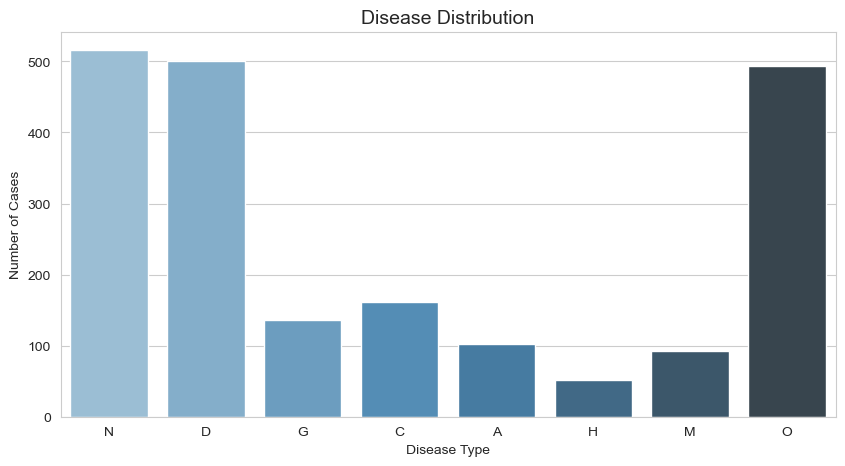

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count cases for each disease
disease_counts = df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Blues_d")
plt.title("Disease Distribution", fontsize=14)
plt.xlabel("Disease Type")
plt.ylabel("Number of Cases")
plt.show()

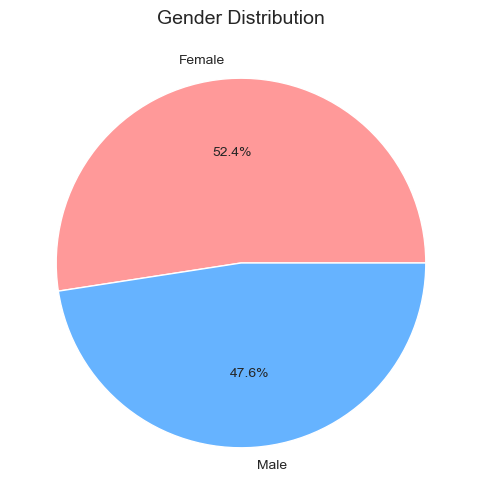

In [56]:
gender_counts = df['Patient Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, 
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Gender Distribution", fontsize=14)
plt.show()

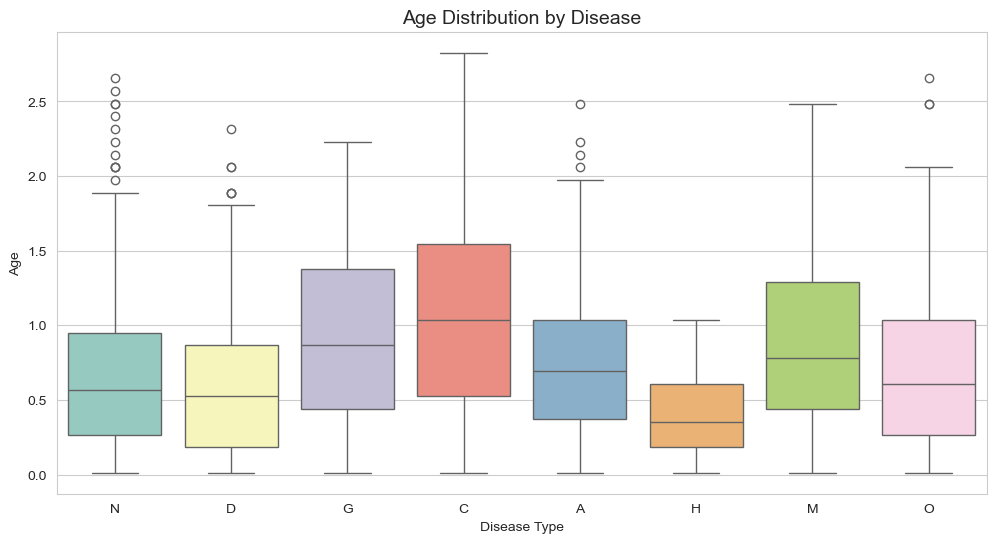

In [58]:
#. Age Distribution by Disease
plt.figure(figsize=(12,6))
melted = df.melt(id_vars=['Patient Age'], value_vars=['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], 
                var_name='Disease', value_name='Has Disease')
melted = melted[melted['Has Disease'] == 1]
sns.boxplot(x='Disease', y='Patient Age', data=melted, palette="Set3")
plt.title("Age Distribution by Disease", fontsize=14)
plt.xlabel("Disease Type")
plt.ylabel("Age")
plt.show()

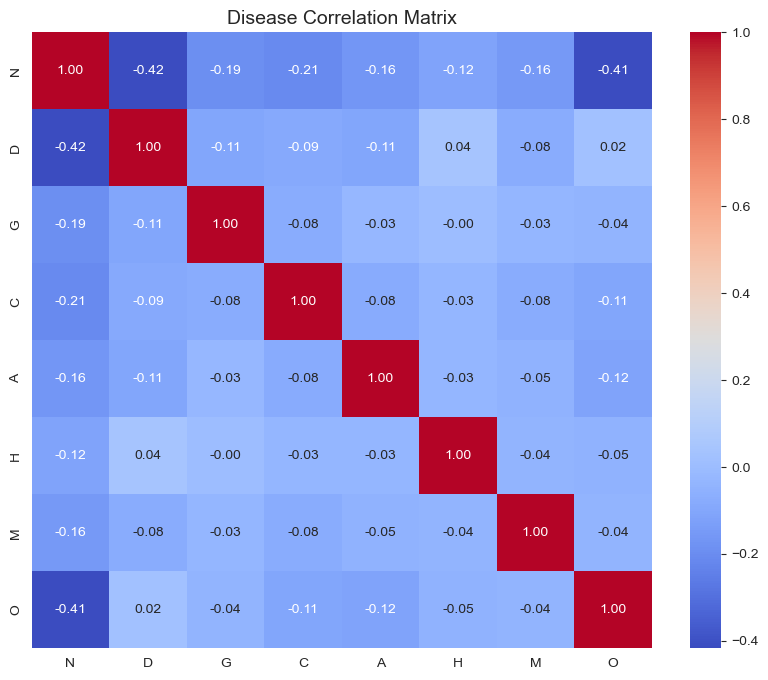

In [59]:
#Disease Correlation (Heatmap)
plt.figure(figsize=(10,8))
corr = df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Disease Correlation Matrix", fontsize=14)
plt.show()